Loaded 398 entries

First entry sample:
{'Model': 'Llama-3.1-8B-Instruct', 'Prediction': 'statement', 'Prompt': 0, 'Incontext': 'different', 'CoT': 'no', 'shot': 0, 'quantization': 'no', 'accuracy': 0.3706422018348624, 'type_accuracy': {'Assignment': 0.5, 'Branch': 0.5888888888888889, 'API': 0.18218623481781376, 'Arithmetic Assignment': 0.2361111111111111, 'Constant Assignment': 0.7794117647058824}}

Found 319 entries with quantization='no'

Average accuracies per prompt and prediction type:
Prompt 0, block: 0.290
Prompt 1, block: 0.289
Prompt 2, block: 0.273
Prompt 3, block: 0.113
Prompt 4, block: 0.247
Prompt 0, input: 0.077
Prompt 1, input: 0.072
Prompt 2, input: 0.067
Prompt 3, input: 0.061
Prompt 4, input: 0.070
Prompt 0, output: 0.249
Prompt 1, output: 0.267
Prompt 2, output: 0.307
Prompt 3, output: 0.225
Prompt 4, output: 0.281
Prompt 0, statement: 0.408
Prompt 1, statement: 0.389
Prompt 2, statement: 0.289
Prompt 3, statement: 0.176
Prompt 4, statement: 0.157

Plot saved as 'av

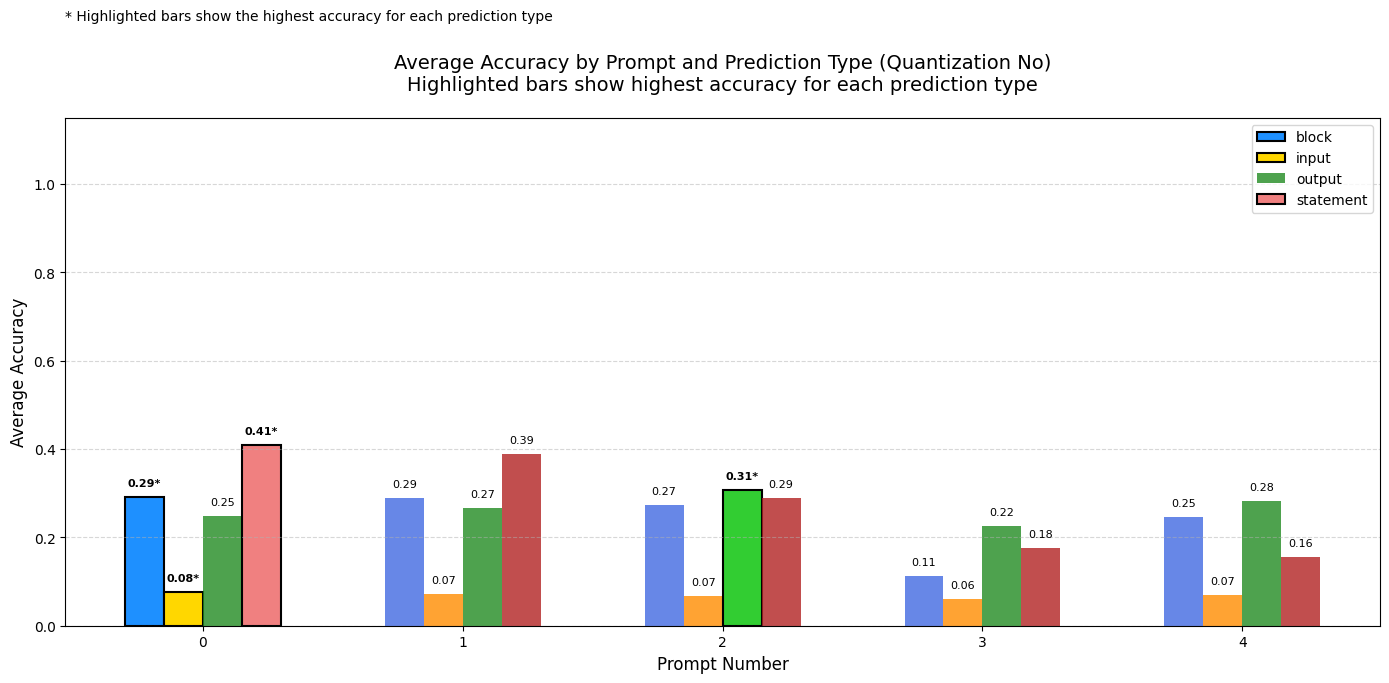

In [6]:
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

try:
    with open('/home/XXX/CodeSemantic/CodeSemantic/result.jsonl', 'r') as f:
        data = [json.loads(line) for line in f]
    print(f"Loaded {len(data)} entries")
except Exception as e:
    print(f"Error loading file: {e}")
    exit()

print("\nFirst entry sample:")
print(data[0])

# Filter for quantization='no' entries
quant_no_data = [entry for entry in data if str(entry.get('quantization', '')).lower() == 'no']
print(f"\nFound {len(quant_no_data)} entries with quantization='no'")

# Organize data by prompt and prediction type
prompt_accuracies = defaultdict(lambda: defaultdict(list))

for entry in quant_no_data:
    try:
        prompt = entry['Prompt']
        prediction_type = entry['Prediction']
        accuracy = entry['accuracy']
        prompt_accuracies[prompt][prediction_type].append(accuracy)
    except KeyError as e:
        print(f"Missing key in entry: {e}")

if not prompt_accuracies:
    print("No data to plot - check your filtering condition")
    exit()

# Get sorted prompts and prediction types
prompts = sorted(prompt_accuracies.keys())
prediction_types = sorted(set(pt for pt_dict in prompt_accuracies.values() for pt in pt_dict.keys()))

# Calculate average accuracies
avg_accuracies = {
    pt: [np.mean(prompt_accuracies[p].get(pt, [np.nan])) for p in prompts]
    for pt in prediction_types
}

print("\nAverage accuracies per prompt and prediction type:")
for pt in prediction_types:
    for i, p in enumerate(prompts):
        print(f"Prompt {p}, {pt}: {avg_accuracies[pt][i]:.3f}")

# Find highest accuracy for each prediction type
highest_values = {}
for pt in prediction_types:
    max_val = max(avg_accuracies[pt])
    max_idx = avg_accuracies[pt].index(max_val)
    highest_values[pt] = (max_idx, max_val)

# Plot settings
bar_width = 0.15  # Width of each bar
opacity = 0.8
colors = ['royalblue', 'darkorange', 'forestgreen', 'firebrick', 'mediumpurple']
highlight_colors = ['dodgerblue', 'gold', 'limegreen', 'lightcoral', 'violet']

# Create figure
plt.figure(figsize=(14, 7))

# Create bars for each prediction type
for i, (pt, color) in enumerate(zip(prediction_types, colors)):
    x_pos = np.arange(len(prompts)) + i * bar_width
    bars = plt.bar(x_pos, avg_accuracies[pt], bar_width,
                  alpha=opacity,
                  color=color,
                  label=pt)
    
    # Highlight the highest bar for this prediction type
    max_idx, max_val = highest_values[pt]
    bars[max_idx].set_color(highlight_colors[i])
    bars[max_idx].set_edgecolor('black')
    bars[max_idx].set_linewidth(1.5)
    bars[max_idx].set_alpha(1.0)

plt.xlabel('Prompt Number', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.title('Average Accuracy by Prompt and Prediction Type (Quantization No)\nHighlighted bars show highest accuracy for each prediction type', 
          fontsize=14, pad=20)

# X-axis ticks
plt.xticks(np.arange(len(prompts)) + bar_width * (len(prediction_types)-1)/2, prompts)
plt.ylim(0, 1.15)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.legend(loc='upper right')

# Add value labels on top of each bar
for i, pt in enumerate(prediction_types):
    for j, p in enumerate(prompts):
        height = avg_accuracies[pt][j]
        if not np.isnan(height):
            # Make highest value label bold
            if j == highest_values[pt][0]:
                plt.text(j + i * bar_width, height + 0.02, f'{height:.2f}*',
                         ha='center', va='bottom', fontsize=8, weight='bold')
            else:
                plt.text(j + i * bar_width, height + 0.02, f'{height:.2f}',
                         ha='center', va='bottom', fontsize=8)

# Add explanation for highlighting
plt.text(0, 1.20, "* Highlighted bars show the highest accuracy for each prediction type",
         ha='left', va='center', fontsize=10, transform=plt.gca().transAxes)

plt.tight_layout()

# Save and show plot
plt.savefig('average_accuracy_by_prompt_and_type_highlighted.png', dpi=300, bbox_inches='tight')
print("\nPlot saved as 'average_accuracy_by_prompt_and_type_highlighted.png'")
plt.show()